# Exam 28th of August 2024 — Course 1MS041 (Introduction to Data Science)

## 1.1 Instructions
1. Complete the problems by following instructions.  
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has **3 problems** for a total of **40 points**, to pass you need **20 points**.  
The bonus will be added to the score and rounded afterwards.

## 1.2 Some general hints and information
- Try to answer all questions even if you are uncertain.  
- Comment your code — partial credit is given if your reasoning is clear.  
- Follow the instruction sheet rigorously.  
- The exam is partially autograded, but your code and free text answers are manually graded anonymously.

## 1.3 Tips for free text answers
You can write LaTeX in Markdown cells:

- `$f(x) = x^2$` → inline math  
- `$$f(x)=x^2$$` → centered display math  

Example:

$$f_{Y|X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha x + \beta)$$

## 1.4 Rules
- You may **not communicate with others** during the exam.  
- You may **not use AI systems such as ChatGPT**.  
- Your online and offline activity may be monitored.

## 1.5 Good luck!

---

### Insert your anonymous exam ID below:


In [112]:
examID = "XXX"

### Exam vB, PROBLEM 1  
**Maximum Points = 14**

In this problem you will do rejection sampling from complicated distributions, and you will also use your samples to compute certain integrals, a method known as *Monte Carlo integration*.  
(Keep in mind that choosing a good sampling distribution is often key to avoid too much rejection.)

1. **[4p]** Fill in the remaining part of the function `problem1_rejection` in order to produce samples from the density, using rejection sampling:

$$f(x) = C (\sin x)^{10}, \quad 0 \le x \le \pi$$


where \(C\) is a value such that \(f\) above is a density (i.e. integrates to one).  
*Hint:* you do not need to know the value of \(C\) to perform rejection sampling.

2. **[2p]** Produce 10 000 samples (use fewer if it takes too long) from the above distribution, put the answer in the variable `problem1_samples`, and plot the histogram.

3. **[2p]** Define \(X\) as a random variable with the density given in part 1. Denote


$$Y = \left(X - \frac{\pi}{2}\right)^2$$


and use the 10 000 samples from part 2 to estimate $(\mathbb{E}[Y])$. Store the result in `problem1_expectation`.

4. **[2p]** Use Hoeffding’s inequality to produce a 95% confidence interval of the expectation above and store the result as a tuple in the variable `problem1_interval`.

5. **[4p]** Can you calculate an approximation of the value of $(C)$ from part 1 using random samples?  
Provide a plot of the histogram from part 2 together with the true density as a curve (this requires the value of $(C)$).  
Explain what method you used and what answer you got.


In [113]:
# Part 1
import numpy as np
def problem1_rejection(n_samples=1):
    """
    Use rejection sampling to draw samples from
        f(x) ∝ (sin x)^10   on [0, π]
    Return a numpy array of length n_samples.
    """
    samples = []

    while (len(samples) < n_samples):
        x = np.random.uniform(0, np.pi)
        
        u = np.random.uniform(0, 1) # same as np.random.rand() => from 0 and 1
        
        # f_tilde = np.sin(x)**10
        # g_x = 1/np.pi
        # M = np.pi
        # acceptance_rate = f_tilde / (M * g_x)
        acceptance_rate = np.sin(x)**10
        if (u <= acceptance_rate):
            samples.append(x)
    
    return np.array(samples)

problem1_rejection(10)
# Below was a way to get the value of M, we use the linspace on the interval given from the exercise,
# which is our case was 0 <= x <= pi

# def f(x):
#     return np.sin(x)**10
    
# gx = 1/np.pi
    
# x = np.linspace(0, np.pi, 1000)

# ratio = f(x) / gx
# M_est = ratio.max()
# print("M should be: ", M_est)

array([1.33696959, 1.36835816, 1.99334969, 1.99778843, 1.53055762,
       2.08834733, 1.96304045, 1.42138771, 1.65064387, 1.39810885])

Number of samples we got:  10000


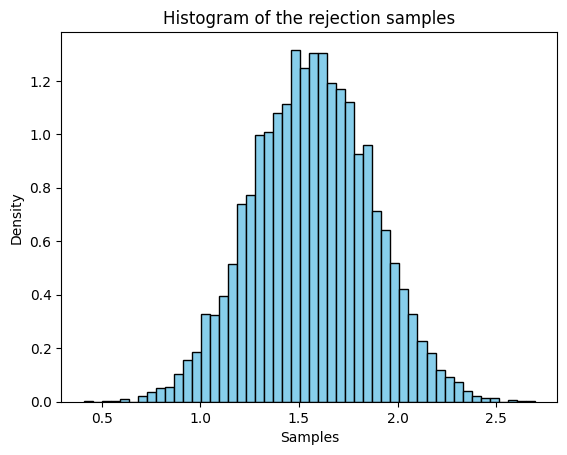

In [114]:
# Part 2
import matplotlib.pyplot as plt
n_samples = 10000
problem1_samples = problem1_rejection(n_samples)

print("Number of samples we got: ", len(problem1_samples))

# Plotting the histogram:
# our data points we want to plot is the problem1_samples

# Here we add the density=True if we want to represent an estimated density (rather than just counts)
# If we don't include density=True, then rename the y-axis to count.
plt.hist(problem1_samples, bins=50, density=True, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Samples')
plt.ylabel('Density')
plt.title('Histogram of the rejection samples')

# Display the plot
plt.show()

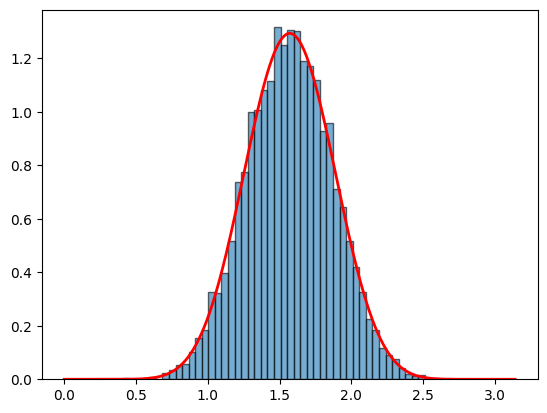

In [115]:
plt.hist(problem1_samples, bins=50, density=True, alpha=0.6, edgecolor='black', label="Samples")
x = np.linspace(0, np.pi, 500)

# Compute the unnormalized true density: f(x) ∝ (sin(x))^10
f_unnormalized = (np.sin(x))**10

# Normalize the curve so that its area becomes 1.
# trapz numerically integrates f_unnormalized over x.
f_normalized = f_unnormalized / np.trapezoid(f_unnormalized, x)

# Plot the true (normalized) density curve
plt.plot(x, f_normalized, 'r-', linewidth=2, label="True density")

In [116]:
# Part 3
n_samples = 10000
X_samples = problem1_rejection(n_samples)
Y_values = (X_samples - (np.pi/2))**2
E_Y = sum(Y_values)
problem1_expectation = (1/n_samples) * (E_Y)

# The problem1_expectation could also be achieved by simply taking the mean of the Y_values 
# which is the same as taking the sum and multiplying with 1/n_samples

print("The expectation is: ", problem1_expectation)

The expectation is:  0.08885958449109382


In [117]:
# Part 4
# The bounds are for Y and not X, therefore we have these values below. 
a = 0
b = (np.pi/2)**2

epsilon = (b-a) * np.sqrt((np.log(0.05/2)/(-2*n_samples)))

lower = problem1_expectation - epsilon
upper = problem1_expectation + epsilon

problem1_interval = [lower, upper]
problem1_interval

[np.float64(0.05534977274889446), np.float64(0.12236939623329318)]

5. **[4p]** Can you calculate an approximation of the value of $(C)$ from part 1 using random samples?  
Provide a plot of the histogram from part 2 together with the true density as a curve (this requires the value of $(C)$).  
Explain what method you used and what answer you got.

In [118]:
# Part 5 — numeric computation of C
N = 10000

U = np.random.uniform(0, np.pi, size=N)

values = np.sin(U) ** 10

I_hat = (np.pi / N) * np.sum(values)

C_hat = 1.0 / I_hat

print("Estimated integral I ≈", I_hat)
print("Estimated C ≈", C_hat)

# Since we had that C = 1/I, where I was the integral.
problem1_C = C_hat
problem1_C

Estimated integral I ≈ 0.7999267234284124
Estimated C ≈ 1.250114505131285


np.float64(1.250114505131285)

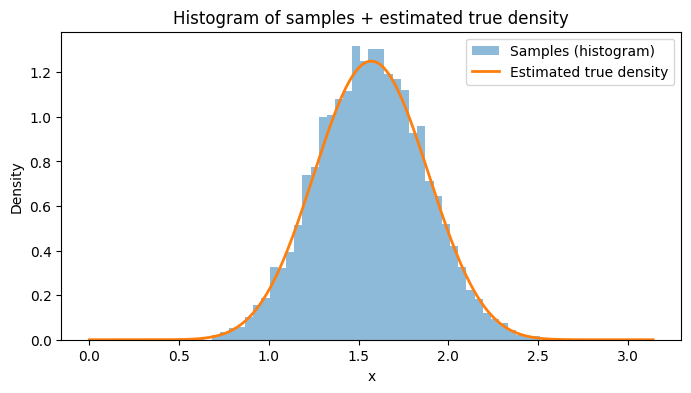

In [119]:
# Part 5 — plot
# Write your plotting code here
# XXXXX
x = problem1_samples  # your samples from problem1_rejection

plt.figure(figsize=(8, 4))
plt.hist(x, bins=50, density=True, alpha=0.5, label="Samples (histogram)")

# 3. Overlay estimated true density curve
x_grid = np.linspace(0, np.pi, 500)

# Now we have a value for C_hat so we use it. 
f_hat = C_hat * (np.sin(x_grid)**10) 
plt.plot(x_grid, f_hat, linewidth=2, label="Estimated true density")

plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.title("Histogram of samples + estimated true density")
plt.show()

## Part 5 — Explanation

Double-click to edit:

### Begin explanation

(Write your method and the approximation of C here.)

### End explanation


## Local Test for Exam vB, PROBLEM 1

Evaluate the cell below to verify that your answers have correct format.

Do NOT modify anything in the test cell.


In [120]:
# This cell checks the format, not correctness
import numpy as np

try:
    assert isinstance(problem1_rejection(10), np.ndarray)
except:
    print("Try again. You should return a numpy array from problem1_rejection")
else:
    print("Good, your problem1_rejection returns a numpy array")

try:
    assert isinstance(problem1_samples, np.ndarray)
except:
    print("Try again. your problem1_samples is not a numpy array")
else:
    print("Good, your problem1_samples is a numpy array")

try:
    assert isinstance(problem1_expectation, float)
except:
    print("Try again. your problem1_expectation is not a float")
else:
    print("Good, your problem1_expectation is a float")

try:
    assert (isinstance(problem1_interval, list) or isinstance(problem1_interval, tuple))
    assert len(problem1_interval) == 2
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")

Good, your problem1_rejection returns a numpy array
Good, your problem1_samples is a numpy array
Good, your problem1_expectation is a float
Good, your problem1_interval is a tuple or list of length 2


## 2.1 Exam vB, PROBLEM 2  
**Maximum Points: 13**

Consider the dataset `CORIS.csv` in the `data` folder. The dataset contains cases of coronary heart disease (CHD) and variables associated with the patient’s condition:

- systolic blood pressure (`sbp`)
- yearly tobacco use in kg (`tobacco`)
- low density lipoprotein (`ldl`)
- adiposity
- family history (0 or 1) (`famhist`)
- type A personality score (`typea`)
- obesity (body mass index)
- alcohol use
- age
- diagnosis of CHD (0 or 1) (`chd`)

Here:
- **X** corresponds to the measurements,
- **Y** is a 0–1 label where 1 represents CHD and 0 represents no CHD.

The code to load the data, perform a train–test–validation split, and train a model is already prepared for you.  
The trained model is stored in `problem2_pipe`, which is an `sklearn` `Pipeline`.

---

### **1. [3p]**

Use **Hoeffding’s inequality** and compute the **95% confidence intervals** for **precision and recall** (etc.) on the **test set**.  
Store your intervals for each class in the variables:

- `problem2_precision0`
- `problem2_recall0`
- `problem2_precision1`
- `problem2_recall1`

Each of these should be a **tuple** `(lower, upper)`.

---

### **2. [3p]**

You are interested in minimizing the **average cost** of your classifier.  
The hospital will use the model as a screening tool:

- If the model predicts **CHD = 1**, the patient is sent for further investigation.
- If the model predicts **CHD = 0**, nothing is done.

You decide to use the following costs:

- True positive (CHD = 1, predicted 1): cost = 0  
- True negative (CHD = 0, predicted 0): cost = 0  
- False positive (CHD = 0, predicted 1): cost = 10  
- False negative (CHD = 1, predicted 0): cost = 300  *(worst case)*

Complete the function `problem2_cost(model, threshold, X, Y)` to compute the **average cost per person** for a given prediction threshold, using `model.predict_proba`.

---

### **3. [4p]**

Select the **threshold** between 0 and 1 that minimizes the **average cost** on the **test set**.  
Check, for example, **100 evenly spaced thresholds** between 0 and 1.

Store:

- the optimal threshold in `problem2_optimal_threshold`
- the cost at this threshold (on the test set) in `problem2_cost_at_optimal_threshold`

---

### **4. [3p]**

With your newly computed threshold, compute the **cost of putting the model in production** by evaluating the cost on the **validation set**.

Also compute a **99% confidence interval** for this cost using **Hoeffding’s inequality**, and store it as:

- `problem2_cost_at_optimal_threshold_validation`
- `problem2_cost_interval = (lower, upper)`


In [121]:
# RUN THIS CELL TO LOAD THE DATA AND SPLIT IT INTO TRAINING, TEST AND VALIDATION SETS
# FINALLY IT TRAINS THE MODEL AS A PIPELINE

import pandas as pd
from sklearn.model_selection import train_test_split

CORISDataset = pd.read_csv("data/CORIS.csv", skiprows=[1, 2])

# Initial data split into features and target
problem2_X = CORISDataset[
    ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']
].values  # Features
problem2_Y = CORISDataset['chd'].values  # Target variable

# Split the data into training, test and validation sets
problem2_X_train, X_tmp, problem2_Y_train, Y_tmp = train_test_split(
    problem2_X, problem2_Y, train_size=0.6, random_state=42
)
problem2_X_test, problem2_X_val, problem2_Y_test, problem2_Y_val = train_test_split(
    X_tmp, Y_tmp, train_size=0.5, random_state=42
)

# Show the shapes of the data
print(
    problem2_X_train.shape,
    problem2_Y_train.shape,
    problem2_X_test.shape,
    problem2_Y_test.shape,
    problem2_X_val.shape,
    problem2_Y_val.shape,
)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create a pipeline with a scaler and a logistic regression model
problem2_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42)),
])

# Fit the pipeline to the training data
problem2_pipe.fit(problem2_X_train, problem2_Y_train)


(277, 9) (277,) (92, 9) (92,) (93, 9) (93,)


,steps,"[('scaler', ...), ('logreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


### Precision and Recall for Class 0 and Class 1

Given the confusion matrix (with `labels=[0, 1]`):

$$
\begin{pmatrix}
TN & FP \\
FN & TP
\end{pmatrix}
$$

we extract:

- True negatives: $TN$
- False positives: $FP$
- False negatives: $FN$
- True positives: $TP$

---

### Class 1 (treat class 1 as the positive class)

- **Precision for class 1**

$$
\text{precision}_1 = \frac{TP}{TP + FP}
$$

- **Recall for class 1**

$$
\text{recall}_1 = \frac{TP}{TP + FN}
$$

---

### Class 0 (treat class 0 as the positive class)

When class 0 is positive, the roles of the confusion matrix entries change:

- $TP_0 = TN$
- $FP_0 = FN$
- $FN_0 = FP$
- $TN_0 = TP$

Thus:

- **Precision for class 0**

$$
\text{precision}_0 = \frac{TP_0}{TP_0 + FP_0} = \frac{TN}{TN + FN}
$$

- **Recall for class 0**

$$
\text{recall}_0 = \frac{TP_0}{TP_0 + FN_0} = \frac{TN}{TN + FP}
$$


In [122]:
# Part 1
# To make a prediction on a dataset `X` you can use the following code:
#   predictions = problem2_pipe.predict(X)
# As with any sklearn model, you can also use:
#   probas = problem2_pipe.predict_proba(X)

# Each precision and recall should be a tuple, for instance:
#   precision0 = (0.9, 0.95)
# The 0 or 1 in the variable name indicates the class.

from sklearn.metrics import confusion_matrix, precision_score, recall_score

# This is the prediction from the test set. 
y_test = problem2_Y_test
y_predictions = problem2_pipe.predict(problem2_X_test)

# confusionMatrix = confusion_matrix(
#     y_test,
#     y_predictions,
#     labels=[0, 1]
# )


# A confusion matrix is:
# [[tn, fp],
#  [fn, tp]]

#           Predicted
#           0      1
#Actual 0 [ TN ,  FP ]
#Actual 1 [ FN ,  TP ]


# .ravel() does this:
# Flattens a 2×2 confusion matrix into [tn, fp, fn, tp] (row-wise order)
tn, fp, fn, tp = confusion_matrix(
    y_test,
    y_predictions,
    labels=[0, 1]
).ravel()

print("tn:", tn)
print("fp:", fp)
print("fn:", fn)
print("tp:", tp)

#precision_0 = precision_score(y_test, y_predictions, labels=[0], average=None)
#print("This is precision for class 0: ", precision_0)

#print("This is the confusion matrix: \n", confusionMatrix)

def calculate_hoeffding(p_hat, n):
    epsilon = np.sqrt((np.log(0.05/2) / (-2*n)))
    
    lower = p_hat - epsilon
    upper = p_hat + epsilon
    
    #lower = max(0.0, p_hat - epsilon)
    #upper = min(1.0, p_hat + epsilon)
    
    return (lower, upper)

n_prec0 = tn + fn
n_rec0 = tn + fp

n_prec1 = tp + fp
n_rec1 = tp + fn

prec0 = tn / n_prec0
rec0 = tn / n_rec0

prec1 = tp / n_prec1
rec1 = tp / n_rec1

problem2_precision0 = calculate_hoeffding(prec0, n_prec0)
problem2_recall0    = calculate_hoeffding(rec0, n_rec0)
problem2_precision1 = calculate_hoeffding(prec1, n_prec1)
problem2_recall1    = calculate_hoeffding(rec1, n_rec1)

print("Precision Class 0: ", problem2_precision0)
print("Recall Class 0: ", problem2_recall0)
print("Precision Class 1: ", problem2_precision1)
print("Recall Class 1: ", problem2_recall1)

# The code below will check that you supply the proper type
assert(type(problem2_precision0) == tuple)
assert(len(problem2_precision0) == 2)
assert(type(problem2_recall0) == tuple)
assert(len(problem2_recall0) == 2)
assert(type(problem2_precision1) == tuple)
assert(len(problem2_precision1) == 2)
assert(type(problem2_recall1) == tuple)
assert(len(problem2_recall1) == 2)

tn: 49
fp: 9
fn: 15
tp: 19
Precision Class 0:  (np.float64(0.5958623105324226), np.float64(0.9353876894675774))
Recall Class 0:  (np.float64(0.6665001207136134), np.float64(1.0231550517001797))
Precision Class 1:  (np.float64(0.42191436672646065), np.float64(0.9352284904163966))
Recall Class 1:  (np.float64(0.3259110409823518), np.float64(0.7917360178411776))


-----
### **2. [3p]**

You are interested in minimizing the **average cost** of your classifier.  
The hospital will use the model as a screening tool:

- If the model predicts **CHD = 1**, the patient is sent for further investigation.
- If the model predicts **CHD = 0**, nothing is done.

You decide to use the following costs:

- True positive (CHD = 1, predicted 1): cost = 0  
- True negative (CHD = 0, predicted 0): cost = 0  
- False positive (CHD = 0, predicted 1): cost = 10  
- False negative (CHD = 1, predicted 0): cost = 300  *(worst case)*

Complete the function `problem2_cost(model, threshold, X, Y)` to compute the **average cost per person** for a given prediction threshold, using `model.predict_proba`.


In [123]:
# Part 2
def problem2_cost(model, threshold, X, Y):
    pred_proba = model.predict_proba(X)[:, 1]
    predictions = (pred_proba >= threshold) * 1

    # Fill in what is missing to compute the cost and return it
    # Note that we are interested in average cost (cost per person)
    tn, fp, fn, tp = confusion_matrix(
        Y,
        predictions,
        labels=[0, 1]
    ).ravel()
    
    total_cost = fp * 10 + fn * 300
    average_cost = total_cost / len(Y)
    return average_cost

---

### **3. [4p]**

Select the **threshold** between 0 and 1 that minimizes the **average cost** on the **test set**.  
Check, for example, **100 evenly spaced thresholds** between 0 and 1.

Store:

- the optimal threshold in `problem2_optimal_threshold`
- the cost at this threshold (on the test set) in `problem2_cost_at_optimal_threshold`

---

In [135]:
# Part 3 – Find the threshold that minimizes average cost on the test set

# We assume that:
# - problem2_cost(model, threshold, X, Y) is already defined (from Part 2)
# - problem2_pipe is our trained pipeline model
# - problem2_X_test and problem2_Y_test are the test features and labels

# 1. Create 100 evenly spaced thresholds between 0 and 1
thresholds = np.linspace(0, 1, 100)

# 2. Initialize "best" values
best_cost = np.inf          # start with +infinity so any real cost will be smaller
best_threshold = None       # will store the threshold that gives the lowest cost

# 3. Loop over all thresholds and compute the average cost on the test set
for t in thresholds:
    # Compute average cost per person on the test set for this threshold
    cost_t = problem2_cost(problem2_pipe, t, problem2_X_test, problem2_Y_test)
    
    # If this cost is lower than what we have seen so far, update the best values
    if cost_t < best_cost:
        best_cost = cost_t
        best_threshold = t

# 4. Store the results in the required variables
problem2_optimal_threshold = best_threshold
problem2_cost_at_optimal_threshold = best_cost

# (Optional) print for inspection
print("Optimal threshold:", problem2_optimal_threshold)
print("Cost at optimal threshold on test set:", problem2_cost_at_optimal_threshold)


Optimal threshold: 0.07070707070707072
Cost at optimal threshold on test set: 5.217391304347826


---

### **4. [3p]**

With your newly computed threshold, compute the **cost of putting the model in production** by evaluating the cost on the **validation set**.

Also compute a **99% confidence interval** for this cost using **Hoeffding’s inequality**, and store it as:

- `problem2_cost_at_optimal_threshold_validation`
- `problem2_cost_interval = (lower, upper)`

In [139]:
# Part 4

problem2_cost_at_optimal_threshold_validation = problem2_cost(problem2_pipe, 
                                                              best_threshold, 
                                                              problem2_X_val, 
                                                              problem2_Y_val)

print("Cost at optimal threshold validation: ", problem2_cost_at_optimal_threshold_validation)

# Report the cost interval as a tuple cost_interval = (a, b)
print("Best threshold", best_threshold)



alpha = 0.01
epsilon = 300 * np.sqrt((np.log(alpha/2) / (-2*len(problem2_Y_val))))

lower = max(0, problem2_cost_at_optimal_threshold_validation - epsilon)
upper = min(300, problem2_cost_at_optimal_threshold_validation + epsilon)
    

problem2_cost_interval = (lower, upper)
print("The interval is: ", problem2_cost_interval)

Cost at optimal threshold validation:  5.698924731182796
Best threshold 0.07070707070707072
The interval is:  (0, np.float64(56.33193719889502))


In [140]:
# The code below will tell you if you filled in the interval correctly
assert(type(problem2_cost_interval) == tuple)
assert(len(problem2_cost_interval) == 2)

# 2.2 Exam vB, PROBLEM 3  
**Maximum Points: 13**

![Markov Chains](exam240828-markovImage.png)

Consider the following two Markov chains:

**Markov chain A**  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Markov chain B**


Answer each question for **both chains**:

---

### **1. [2p]**  
What is the **transition matrix**?  
Your answer for each chain should be a NumPy array of shape `(n_states, n_states)`  
where states `(A, B, …)` correspond to indices `(0, 1, …)`.

---

### **2. [1p]**  
Is the Markov chain **irreducible**?  
Answer with `True` or `False` for each chain.

---

### **3. [4p]**  
Is the Markov chain **aperiodic**?  
What is the **period of each state**?

Provide:

- a boolean (`True`/`False`) indicating if the chain is aperiodic
- a NumPy array with the **period of each state**, shape `(n_states,)`

*Hint:* Recall the definition of period:  

$$\text{period}(i) = \gcd\{\, t \ge 1 : P(X_t = i \mid X_0 = i) > 0 \,\}$$


---

### **4. [2p]**  
If the chain starts in state A at time 0, what is the probability of being in state B at time 5?  

Store this in:

- `problem3_A_PB5`
- `problem3_B_PB5`

---

### **5. [4p]**  
Let \(T\) be the **first hitting time of state D**, starting from state A:


$$T(\omega) = \inf \{\, t \in \mathbb{N} : X_t(\omega) = D \,\}$$


where the infimum over an empty set is $\infty$.

Compute:

- $P(T = 1)$  
- $P(T = 2)$  
- $P(T = 3)$  
- $P(T = 4)$  
- $P(T = 5)$  
- $P(T = \infty)$  


for both chains A and B, and store them in the provided variables.


In [142]:
# PART 1
# ------------------------ TRANSITION MATRIX -------------------------------

# Supply each transition matrix as a numpy array of shape (n_states, n_states).
# State order must match exam order, typically (A, B, C, D, ...).

problem3_A = np.array([[0, 0.2, 0, 0.8], [0,0,1,0], [0,1,0,0], [0.5,0,0.5,0]])
problem3_B = np.array([[0,1,0,0,0,0], [0,0,1,0,0,0], [0,0.5,0,0.5,0,0], [0,0,0.5,0,0.5,0], [0,0,0,0,0,1], [0.5,0,0,0,0.5,0]])

print("This is matrix A: \n", problem3_A)
print("This is matrix B: \n", problem3_B)

This is matrix A: 
 [[0.  0.2 0.  0.8]
 [0.  0.  1.  0. ]
 [0.  1.  0.  0. ]
 [0.5 0.  0.5 0. ]]
This is matrix B: 
 [[0.  1.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.5 0.  0.  0.  0.5 0. ]]


In [ ]:
# PART 2
# ------------------------ IRREDUCIBLE -------------------------------

problem3_A_irreducible = False
problem3_B_irreducible = True

In [ ]:
# PART 3
# ------------------------ APERIODIC -------------------------------

# Answer each with True or False
problem3_A_is_aperiodic = False
problem3_B_is_aperiodic = False

# A numpy array of shape (n_states,) containing periods for each state
problem3_A_periods = np.array([2,2,2,2])
problem3_B_periods = np.array([2,2,2,2,2,2])

### **4. [2p]**  
If the chain starts in state A at time 0, what is the probability of being in state B at time 5?  

Store this in:

- `problem3_A_PB5`
- `problem3_B_PB5`

---

In [143]:
# PART 4
# ------------------------ PROBABILITY OF B AFTER 5 STEPS -------------------------------

problem3_A_PB5 = np.linalg.matrix_power(problem3_A, 5)[0, 1]
problem3_B_PB5 = np.linalg.matrix_power(problem3_B, 5)[0, 1]

print("Matrix A: Probability from A to B at time 5: ", problem3_A_PB5)
print("Matrix B: Probability from A to B at time 5: ", problem3_B_PB5)

Matrix A: Probability from A to B at time 5:  0.872
Matrix B: Probability from A to B at time 5:  0.375


### **5. [4p]**  
Let \(T\) be the **first hitting time of state D**, starting from state A:


$$T(\omega) = \inf \{\, t \in \mathbb{N} : X_t(\omega) = D \,\}$$


where the infimum over an empty set is $\infty$.

Compute:

- $P(T = 1)$  
- $P(T = 2)$  
- $P(T = 3)$  
- $P(T = 4)$  
- $P(T = 5)$  
- $P(T = \infty)$  


for both chains A and B, and store them in the provided variables.

In [ ]:
# PART 5
# ------------------------ HITTING TIME DISTRIBUTION -------------------------------

# Probabilities for T = 1, 2, 3, 4, 5, and ∞ for chain A
problem3_A_PT1 = 0.8
problem3_A_PT2 = 0
problem3_A_PT3 = 0
problem3_A_PT4 = 0
problem3_A_PT5 = 0
problem3_A_PT_inf = 0

# Probabilities for chain B
problem3_B_PT1 = XXX
problem3_B_PT2 = XXX
problem3_B_PT3 = XXX
problem3_B_PT4 = XXX
problem3_B_PT5 = XXX
problem3_B_PT_inf = XXX